In [80]:
from scipy.stats import norm, gamma
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

$\mathbb{P}\left(M_t \leq m\right)$

In [81]:
m = np.linspace(0,100, 10_000)

mu = 1
sigma = 5
t = 10

Pm = norm.cdf( (m - mu*t)/(sigma*np.sqrt(t))) - np.exp( (2*m*mu)/sigma**2 )*norm.cdf(- (m+mu*t)/(sigma*np.sqrt(t)))

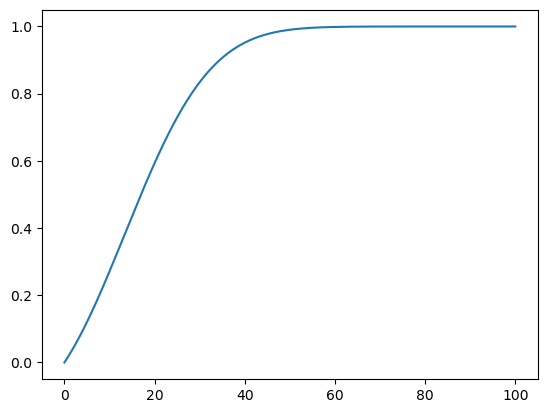

In [82]:
plt.plot(m,Pm)

$f_{T_l}(t)$

In [83]:
l=10
mu=0.1
sigma=0.5
tspan = [0, 4*l/mu]

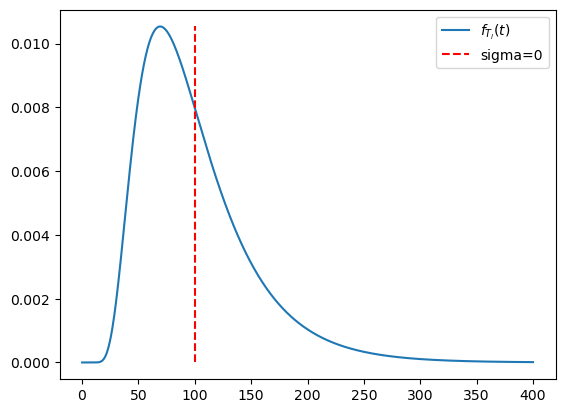

In [84]:
t = np.linspace(0.1,tspan[1],1_000)

ft_first = norm.pdf( (l-mu*t) / (sigma * np.sqrt(t)))*((mu*t+l)/(2*sigma*np.sqrt(t)*t))
ft = norm.pdf( (l-mu*t) / (sigma * np.sqrt(t)))*((mu*t+l)/(2*sigma*np.sqrt(t)*t)) + np.exp(2*l*mu/sigma**2) * norm.pdf(- (l+mu*t)/(sigma*np.sqrt(t)))*((l-mu*t)/(2*sigma*np.power(t,3/2)))

fig, ax = plt.subplots(1,1)
ax.plot(t,ft, label="$f_{T_l}(t)$")
# ax.plot(t,ft_first, "r", label="$f_{T_l}$[1]")
ax.vlines(l/mu, min(ft[ft==ft]), max(ft[ft==ft]), colors="r", linestyles="dashed", label="sigma=0")
ax.legend();

Monte-Carlo verification of $f_{T_l}$

  4%|▍         | 1/25 [00:12<05:05, 12.74s/it]

99.9475% sim succeeded


  8%|▊         | 2/25 [00:23<04:30, 11.76s/it]

99.9375% sim succeeded


 12%|█▏        | 3/25 [00:34<04:11, 11.45s/it]

99.95% sim succeeded


 16%|█▌        | 4/25 [00:46<03:58, 11.34s/it]

99.955% sim succeeded


 20%|██        | 5/25 [00:57<03:45, 11.30s/it]

99.9425% sim succeeded


 24%|██▍       | 6/25 [01:08<03:34, 11.30s/it]

99.94% sim succeeded


 28%|██▊       | 7/25 [01:19<03:23, 11.31s/it]

99.9575% sim succeeded


 32%|███▏      | 8/25 [01:31<03:11, 11.28s/it]

99.95% sim succeeded


 36%|███▌      | 9/25 [01:42<03:01, 11.37s/it]

99.94% sim succeeded


 40%|████      | 10/25 [01:54<02:51, 11.45s/it]

99.95% sim succeeded


 44%|████▍     | 11/25 [02:06<02:41, 11.54s/it]

99.9325% sim succeeded


 48%|████▊     | 12/25 [02:17<02:30, 11.59s/it]

99.955% sim succeeded


 52%|█████▏    | 13/25 [02:30<02:24, 12.04s/it]

99.96000000000001% sim succeeded


 56%|█████▌    | 14/25 [02:43<02:15, 12.36s/it]

99.9525% sim succeeded


 60%|██████    | 15/25 [02:56<02:02, 12.29s/it]

99.9325% sim succeeded


 64%|██████▍   | 16/25 [03:08<01:50, 12.27s/it]

99.94% sim succeeded


 68%|██████▊   | 17/25 [03:20<01:37, 12.24s/it]

99.9475% sim succeeded


 72%|███████▏  | 18/25 [03:32<01:25, 12.24s/it]

99.96000000000001% sim succeeded


 76%|███████▌  | 19/25 [03:44<01:12, 12.12s/it]

99.95% sim succeeded


 80%|████████  | 20/25 [03:56<01:00, 12.15s/it]

99.9475% sim succeeded


 84%|████████▍ | 21/25 [04:08<00:48, 12.14s/it]

99.955% sim succeeded


 88%|████████▊ | 22/25 [04:21<00:36, 12.31s/it]

99.96000000000001% sim succeeded


 92%|█████████▏| 23/25 [04:33<00:24, 12.30s/it]

99.9675% sim succeeded


 96%|█████████▌| 24/25 [04:45<00:12, 12.23s/it]

99.9475% sim succeeded


100%|██████████| 25/25 [04:58<00:00, 11.94s/it]

99.9525% sim succeeded


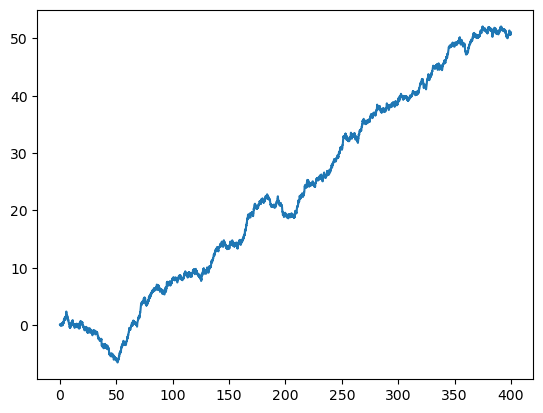

In [85]:
n = 1_000_000       # Number of simulations
nt = 5_000      # fineness of simulation

n_batch = 25

tt = np.linspace(tspan[0], tspan[1], num = nt + 1)
dt = (tspan[1] - tspan[0]) / nt

T_res = []

for i in tqdm(range(n_batch)):
    t = np.concatenate( (np.zeros((n//n_batch,1)), norm.rvs(size = (n//n_batch,nt))), axis=1) * np.sqrt(dt)
    t = sigma*np.cumsum(t, axis=1) + mu*tt

    T = np.argmax(t >= l, axis=1)

    i_succes_sim = np.max(t, axis=1) > l
    T = T[i_succes_sim]*dt

    T_res = np.concatenate((T_res, T))

    print(f"{i_succes_sim.mean()*100}% sim succeeded")


plt.plot(tt,t[0,:])

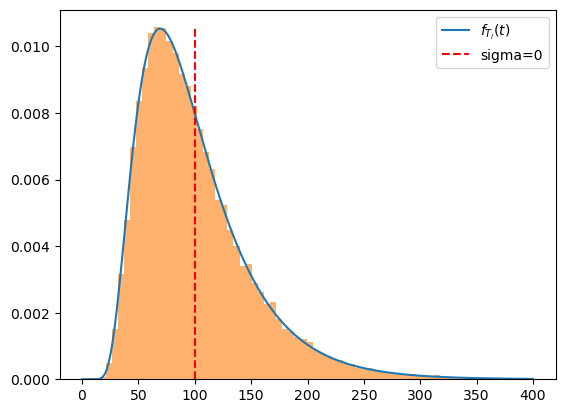

In [86]:
h = ax.hist(T, bins=70, density=True, alpha=0.6)
fig

Gamma approximation (fit to simulation)

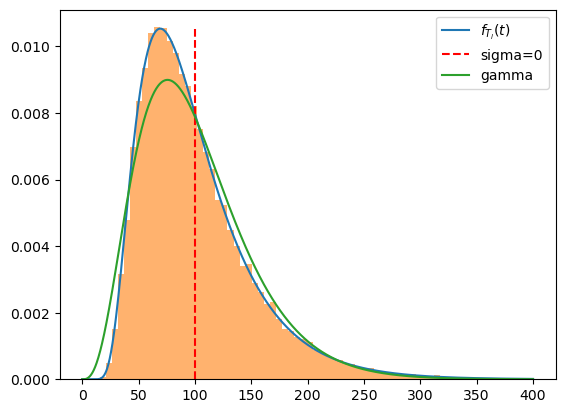

In [87]:
# mean
mean = T.mean()

# variance
var = T.var()

theta = var/mean
k = mean/theta

tt = np.linspace(0,tspan[1], 1_000)
ft_gamma = gamma.pdf(tt, k, scale=theta)

# Plot
ax.plot(tt,ft_gamma, label="gamma")
ax.legend()
fig

In [88]:
# mean_th = np.exp(-l*mu/sigma**2)*(-2*mu*sigma**2/mu**3 + 4*l/mu)
# mean_th = np.exp(-l*mu/sigma**2)*(4*l/mu)
mean_th = l/mu
var_th = l*sigma**2 / mu**3

print(f"theoretical mean: {mean_th}")

print(f"simmulation mean: {mean}")

print(f"simmulation var: {var}")

print(f"theoretical var: {var_th}")

print(f"simulation time fineness: {dt}")

theoretical mean: 100.0
simmulation mean: 100.34345914309297
simmulation var: 2468.2242218754036
theoretical var: 2499.9999999999995
simulation time fineness: 0.08


In [89]:
np.var(T)

2468.2242218754036

In [90]:
l*sigma**2 / mu**3

2499.9999999999995